The goal of this project is to recommend images based on preferences of the user. We will build this system in three practical sessions.
We have to collect the following data.

    A set of images.
    Ask the user to select some images and add tags.
    We analyse user created-tags and information (like image size, predominant colors) of available images to propose new images to the user.

For this question, you have the following tasks to program:

    Create a folder called testimages.
    Download open-licensed images to the folder testimages.
    Save information of images (like predominant colors, tags, image size etc.) in a JSON file.

Ask the user to select some images and add tags. For every user, you are now in a position to build user-preference profile, based on this selection. You can collect information like

    Favorite colors
    Favorite image sizes (thumbnail images, large images, medium-size images etc.)
    Tags
    ...


Recuperation de la  1  couleur(s) des 76  images
ajout de  blonde_bar_amis.jpg ...


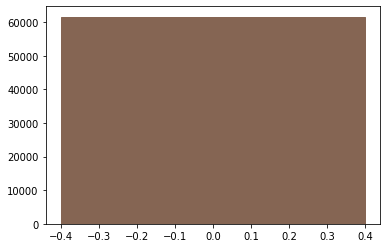

ajout de  blonde_bar_trinque.jpg ...


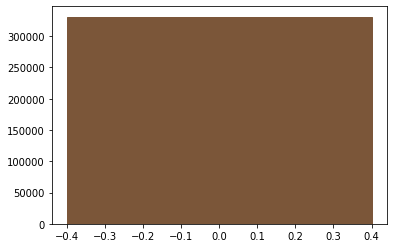

ajout de  blonde_exterieur_amis.jpg ...


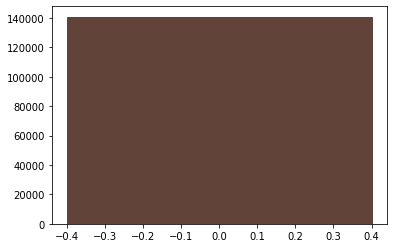

ajout de  blonde_exterieur_art (2).jpg ...


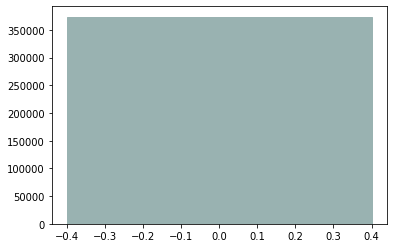

ajout de  blonde_exterieur_art.jpg ...


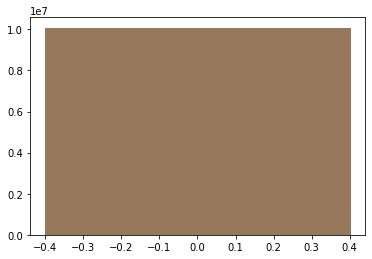

ajout de  blonde_interieur_trinque.jpg ...


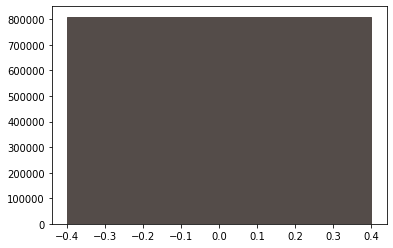

ajout de  blonde_montage_art.jpg ...


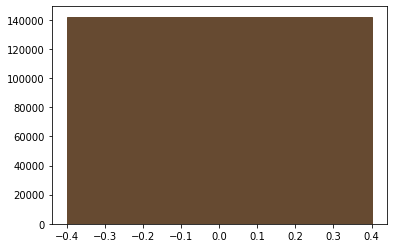

ajout de  blonde_montage_foot.jpg ...


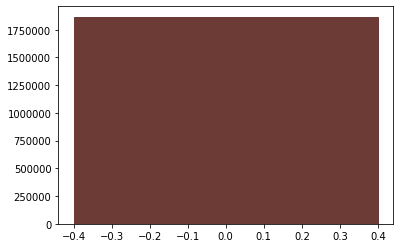

ajout de  blonde_salon_degustaion.jpg ...


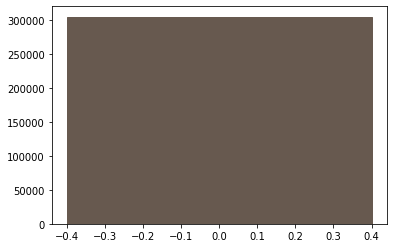

ajout de  blonde_soiree_amis.jpg ...


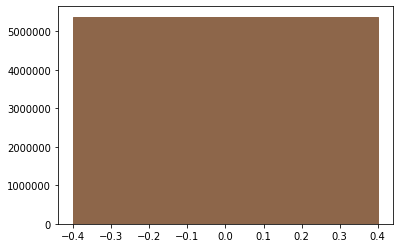

ajout de  blonde_terasse_amis (2).jpg ...


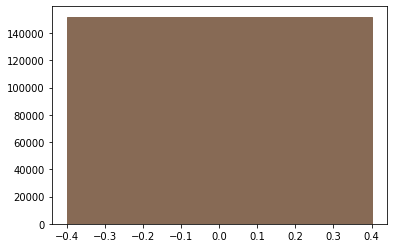

ajout de  blonde_terasse_degustation.jpg ...


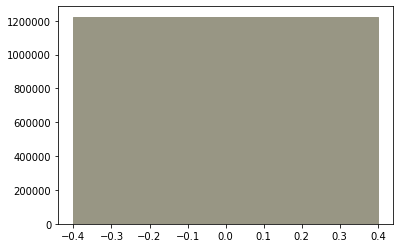

ajout de  bouteille_bar_amis.jpg ...


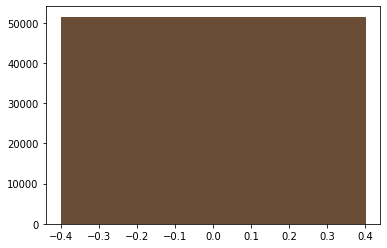

ajout de  bouteille_bar_collection.jpg ...


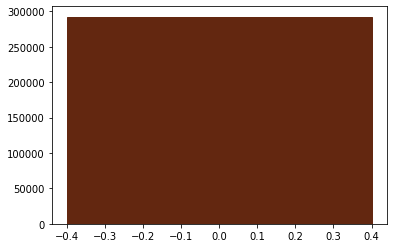

ajout de  bouteille_exterieur_art.png ...


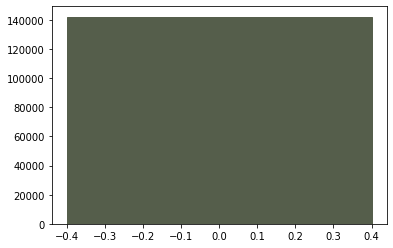

ajout de  bouteille_exterieur_publicite (2).jpg ...


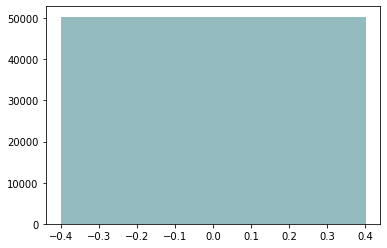

ajout de  bouteille_exterieur_publicite (2).png ...


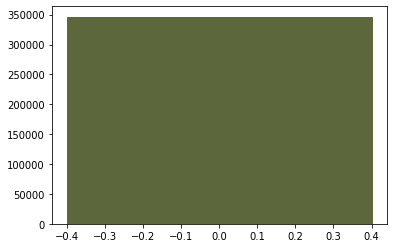

ajout de  bouteille_exterieur_publicite (3).png ...


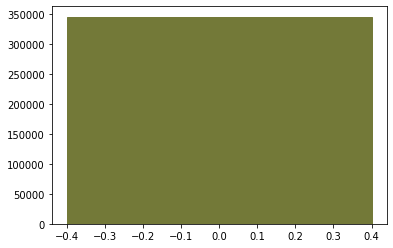

ajout de  bouteille_exterieur_publicite (4).png ...


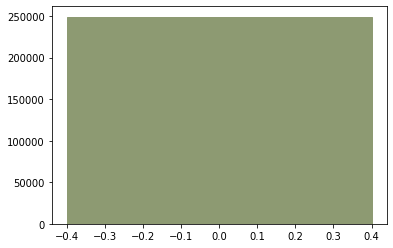

ajout de  bouteille_exterieur_publicite.jpg ...


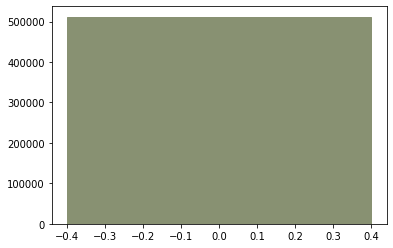

ajout de  bouteille_exterieur_publicite.png ...


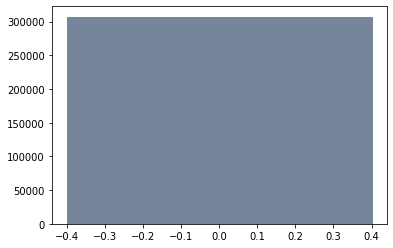

ajout de  bouteille_interieur_art.jpg ...


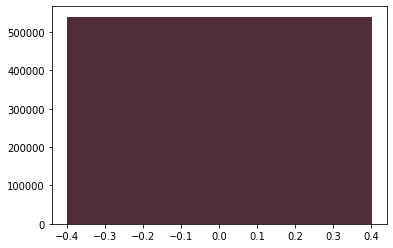

ajout de  bouteille_interieur_art.png ...


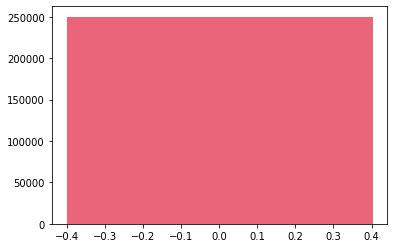

ajout de  bouteille_interieur_collection.png ...


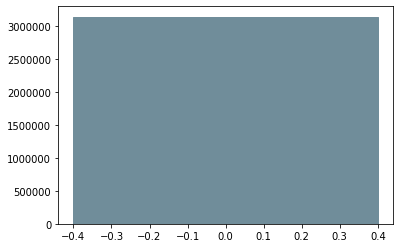

ajout de  bouteille_interieur_degustation (2).jpg ...


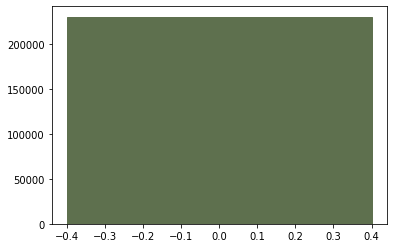

ajout de  bouteille_interieur_publicite.jpg ...


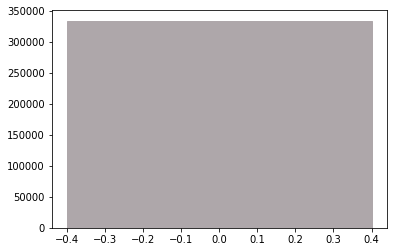

ajout de  bouteille_magasin_collection.jpg ...


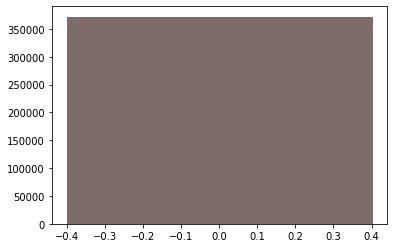

ajout de  bouteille_montage_art (2).png ...


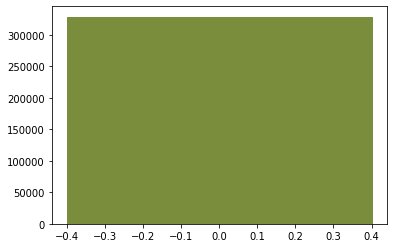

ajout de  bouteille_montage_art (3).png ...


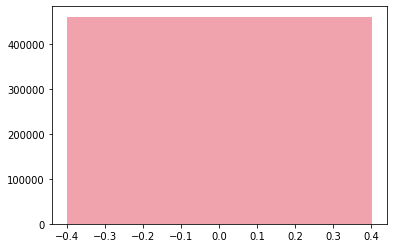

ajout de  bouteille_montage_art (4).png ...


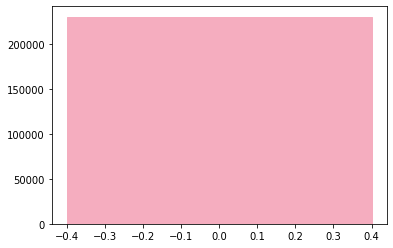

ajout de  bouteille_montage_art.png ...


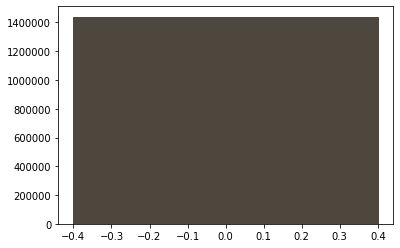

ajout de  bouteille_montage_collection.jpg ...


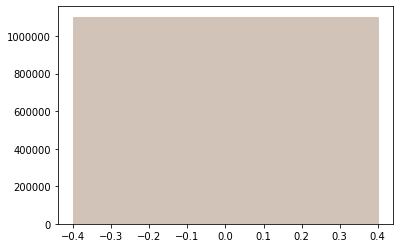

ajout de  bouteille_montage_collection.png ...


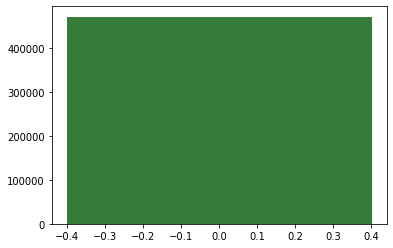

ajout de  bouteille_montage_degustation.jpg ...


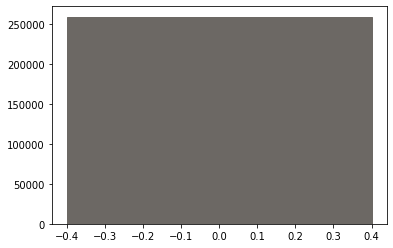

ajout de  bouteille_montage_foot.jpg ...


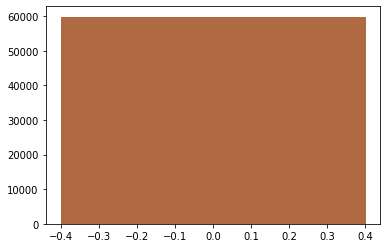

ajout de  bouteille_montage_publicite (2).jpg ...


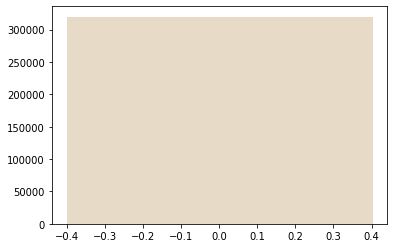

ajout de  bouteille_montage_publicite (3).jpg ...


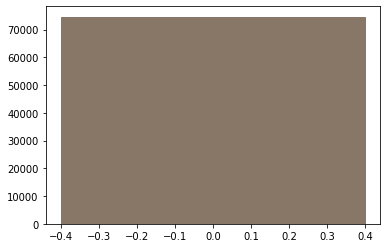

ajout de  bouteille_montage_publicite (4).jpg ...


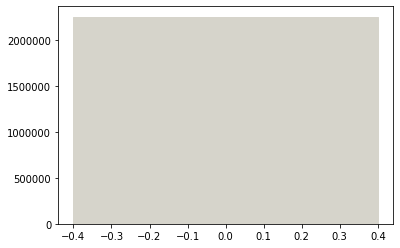

ajout de  bouteille_montage_publicite (4).png ...


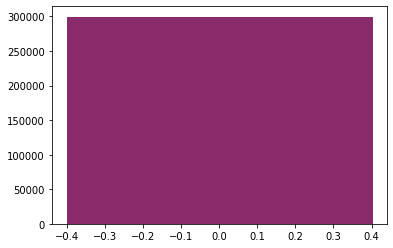

ajout de  bouteille_montage_publicite (5).png ...


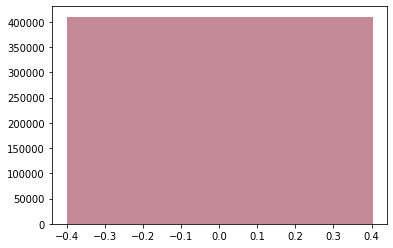

ajout de  bouteille_montage_publicite.jpg ...


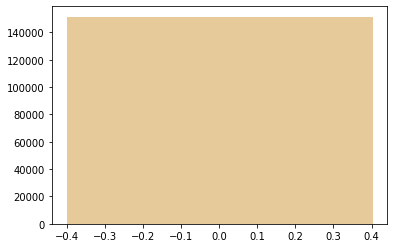

ajout de  bouteille_montage_publicite.png ...


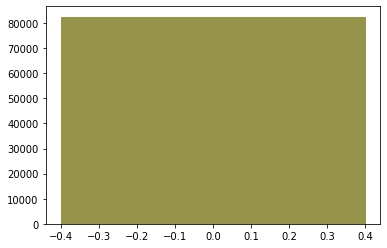

ajout de  bouteille_salon_degustation.jpg ...


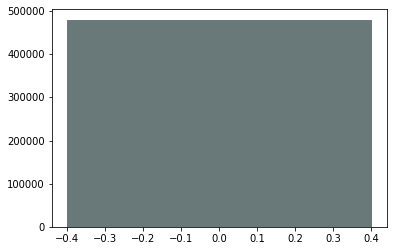

ajout de  bouteille_soiree_amis (3).jpg ...


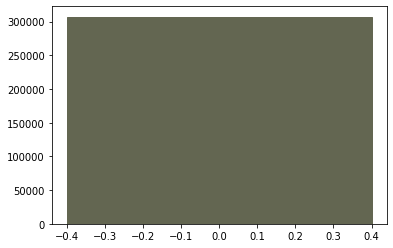

ajout de  bouteille_soiree_amis.jpg ...


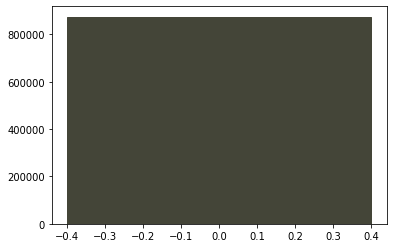

ajout de  bouteille_soiree_collection.jpg ...


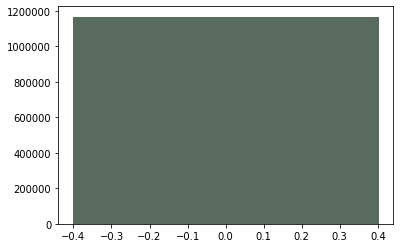

ajout de  bouteille_sol_collection (2).jpg ...


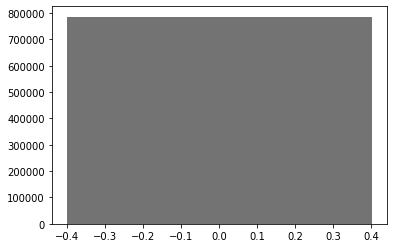

ajout de  bouteille_sol_collection (3).jpg ...


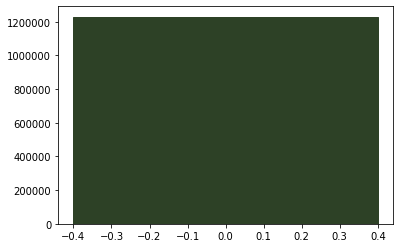

ajout de  bouteille_sol_collection.jpg ...


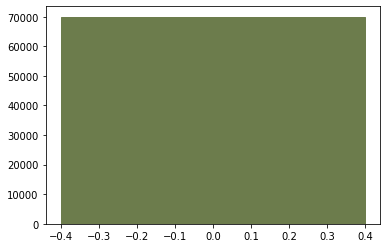

ajout de  bouteille_sol_publicite.jpg ...


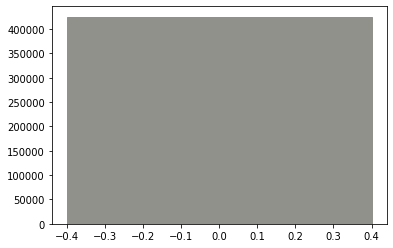

ajout de  brune_montage_publicite.jpg ...


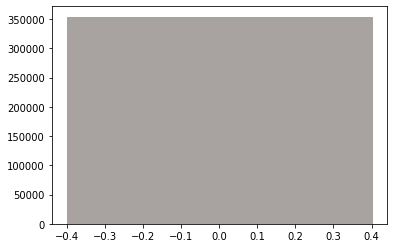

ajout de  brune_sol_publicite.jpg ...


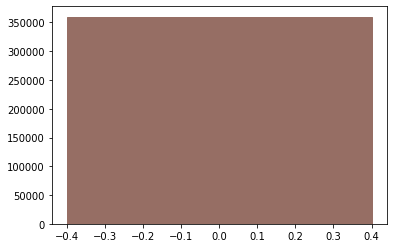

ajout de  canette_exterieur_publicite (2).jpg ...


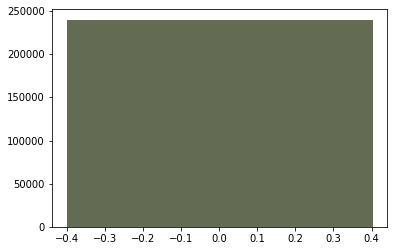

ajout de  canette_exterieur_publicite.jpg ...


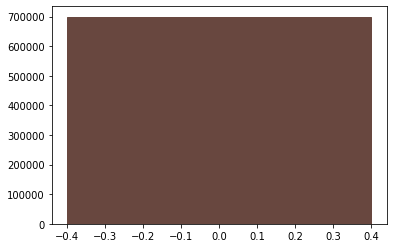

ajout de  canette_interieur_degustation.jpg ...


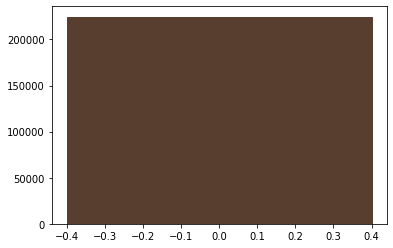

ajout de  canette_magasin_collection.jpg ...


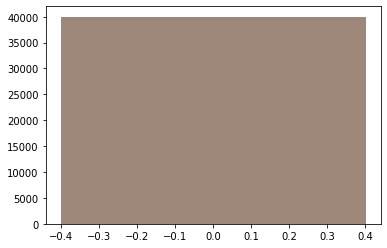

ajout de  cannette_salon_degustation.jpeg ...


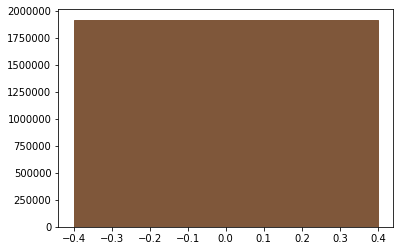

ajout de  cocktail_bar_art.jpg ...


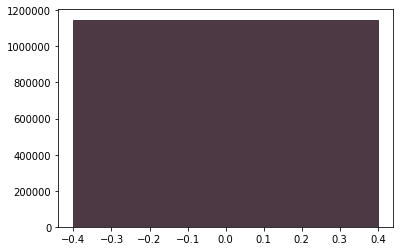

ajout de  pression_bar_art (2).jpg ...


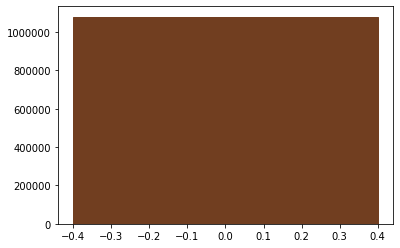

ajout de  pression_bar_art.jpeg ...


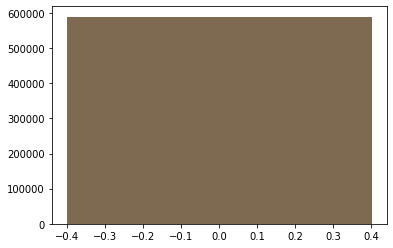

ajout de  pression_bar_art.jpg ...


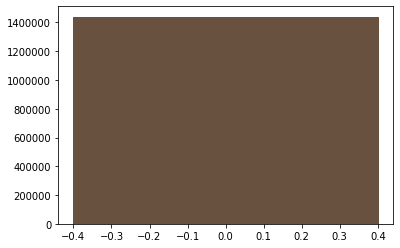

ajout de  pression_bar_degustation.jpg ...


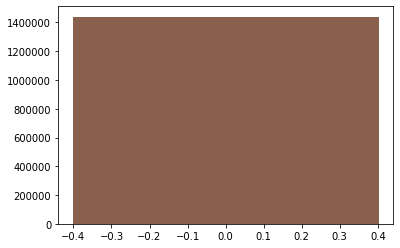

ajout de  pression_bar_tireuse (2).jpg ...


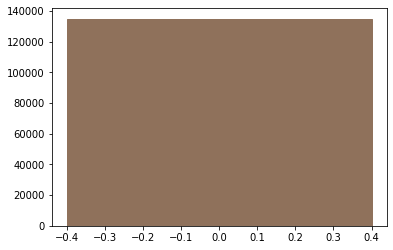

ajout de  pression_bar_tireuse (3).jpg ...


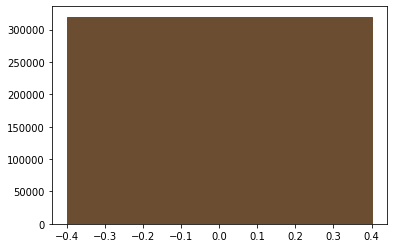

ajout de  pression_bar_tireuse (4).jpg ...


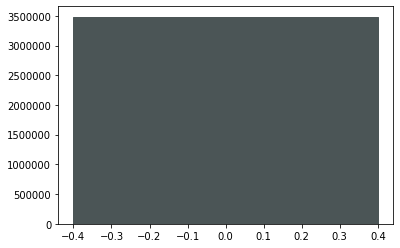

ajout de  pression_bar_tireuse.jpg ...


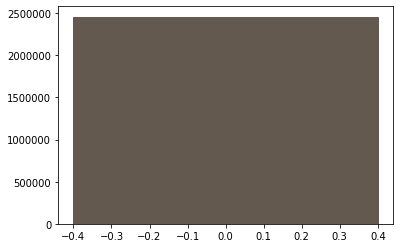

ajout de  pression_bar_trinque (3).jpg ...


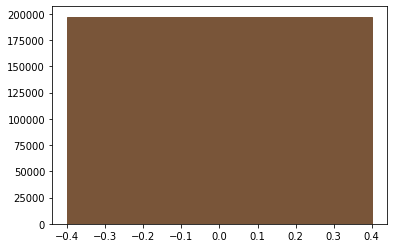

ajout de  pression_bar_trinque (4).jpg ...


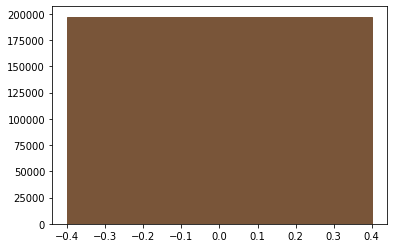

ajout de  pression_interieur_art (2).jpg ...


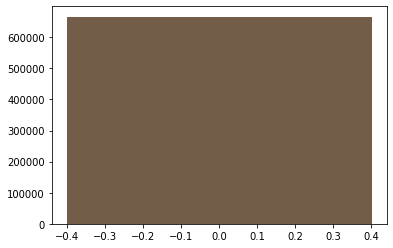

ajout de  pression_interieur_art.jpg ...


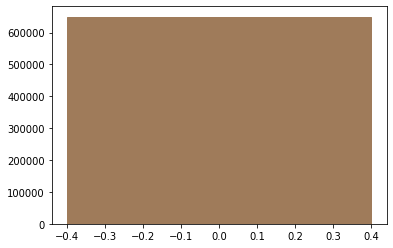

ajout de  pression_montage_art (2).jpg ...


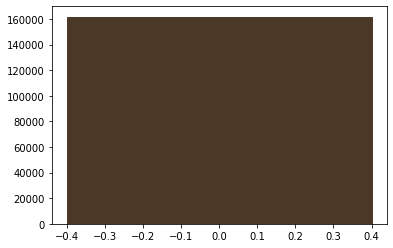

ajout de  pression_montage_art.jpg ...


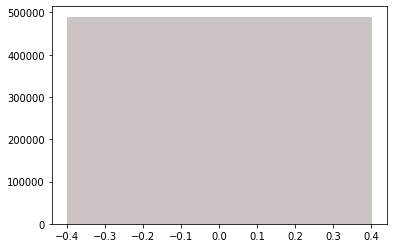

ajout de  pression_montage_publicite.png ...


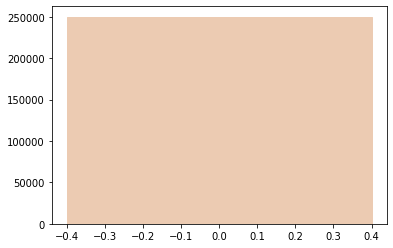

ajout de  pression_terasse_degustation.jpg ...


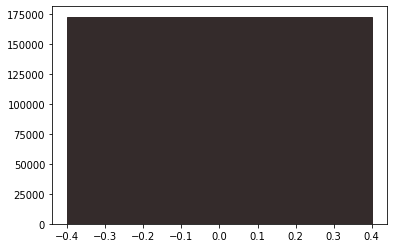

ajout de  verre_exterieur_art (2).png ...


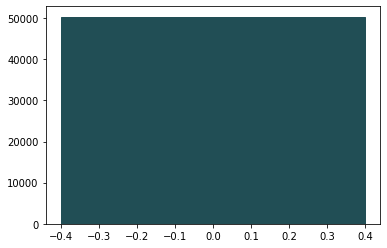

ajout de  verre_exterieur_art.png ...


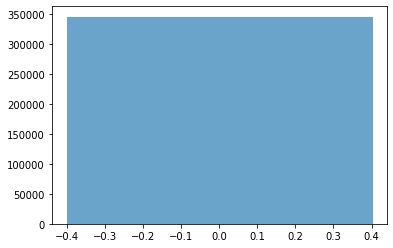

Fin, voir le fichier json


In [20]:
from PIL import Image


from operator import itemgetter
import numpy
import math
import matplotlib.pyplot as plot
from PIL import Image


from operator import itemgetter
import numpy
import math
import matplotlib.pyplot as plot
import glob
import json
import os
from sklearn.cluster import KMeans

listTotImage = glob.glob("project/testimages/*")
selectionMax = len(listTotImage) #Nombre d'images max selectionnées
samples = ["blonde_bar_amis",
"bouteille_bar_collection",
"bouteille_montage_publicite (4)",
"bouteille_montage_foot",
"pression_bar_tireuse (4)",
"canette_magasin_collection",
"cannette_salon_degustation",
"verre_exterieur_art",
"pression_bar_trinque (3)",
"cocktail_bar_art",
"brune_sol_publicite",
"bouteille_interieur_degustation (2)",
"pression_terasse_degustation",
"bouteille_soiree_amis",
"bouteille_exterieur_publicite",
"bouteille_montage_art (2)",
"bouteille_interieur_art",
"bouteille_exterieur_publicite (2)",
"bouteille_interieur_collection"
]
n = 1
count = 0
print("Recuperation de la ",n, " couleur(s) des",selectionMax," images")
f = open("project/data.json", "w")
f.write("")
f.close()
dataName = {}
datap = []
for i in listTotImage:
    data = {}
    data['name'] = os.path.basename(i)
    fullName = os.path.basename(i).split(".", 1)[0] #enlever le format
    tagName = fullName.split(" ", 1)[0].split("_") #enlever texte parasites
    data['tag'] = tagName
    if fullName in samples :
        data['isSample'] = 1
    else :
        data['isSample'] = 0
    imgfile = Image.open(i)
    numarray = numpy.array(imgfile.getdata(), numpy.uint8)
    clusters = KMeans(n_clusters = n)
    clusters.fit(numarray)
    npbins = numpy.arange(0, n+1)
    #nbpins = array([0, 1, ..., n-1])
    histogram = numpy.histogram(clusters.labels_, bins=npbins)
    labels = numpy.unique(clusters.labels_)
    colors = []
    sizes = histogram[0]
    barlist = plot.bar(labels, histogram[0])
    def rgb_to_hex(rgb):
        return "#%02x%02x%02x" % rgb
    for j in range(n):
        color = rgb_to_hex(
           (math.ceil(clusters.cluster_centers_[j][0]), 
            math.ceil(clusters.cluster_centers_[j][1]), 
            math.ceil(clusters.cluster_centers_[j][2])))
        barlist[j].set_color('#%02x%02x%02x' % (math.ceil(clusters.cluster_centers_[j][0]),
    math.ceil(clusters.cluster_centers_[j][1]), math.ceil(clusters.cluster_centers_[j][2])))
        colors.append(color)
    data["color"] = color
    data["intensity"] = sizes.tolist()[0]
    data["size"] = os.path.getsize(i)
    print("ajout de ",os.path.basename(i),"...")
    #plot.pie(sizes, labels=labels, colors=colors,shadow=True, startangle=140)
    plot.show() 
    datap.append(data)
dataName['pictures'] = datap
dataUser = {"username": "admin", "favorites": []}
dataU = []
dataU.append(dataUser)
dataName['users'] = dataU  
with open('project/data.json', 'a') as outfile:
    json.dump(dataName, outfile)
print("Fin, voir le fichier json")

#### Interaction avec l'utlisateur

Que voulez-vous faire ? (1: création de compte | 2: connexion)2
Quel est votre pseudo ?Arthur
1 : Proposez des images | 2 : Gerer les favoris1
Recherches des meilleures images...


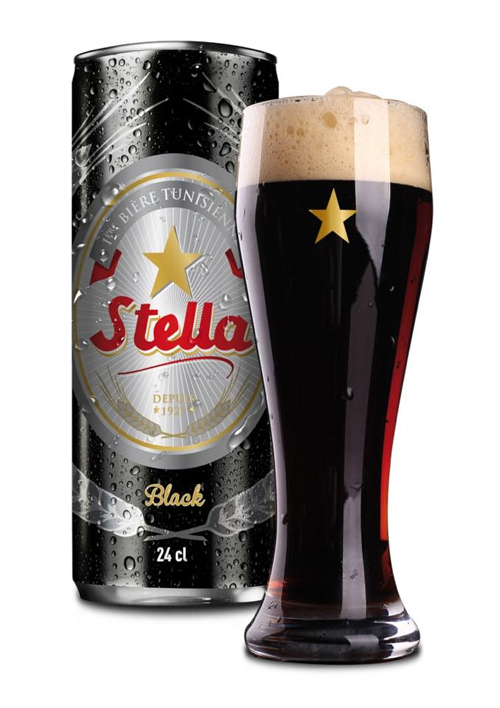

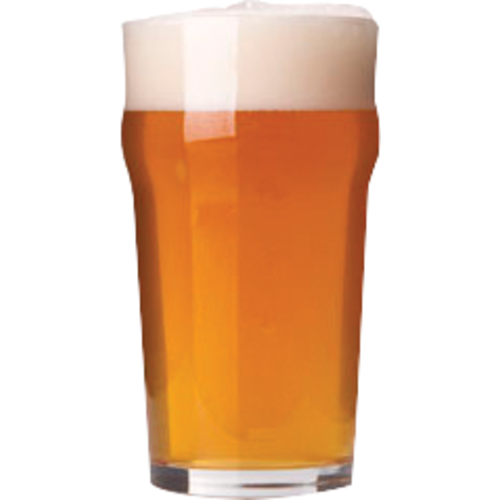

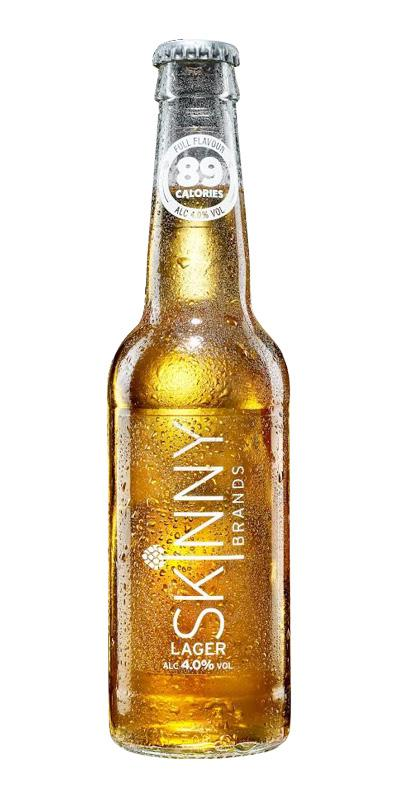

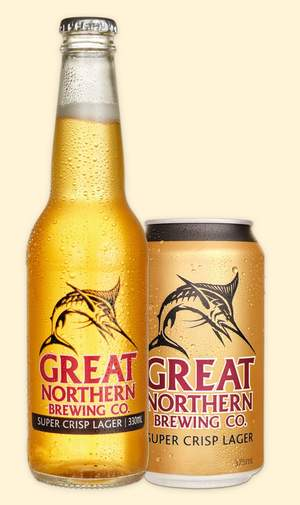

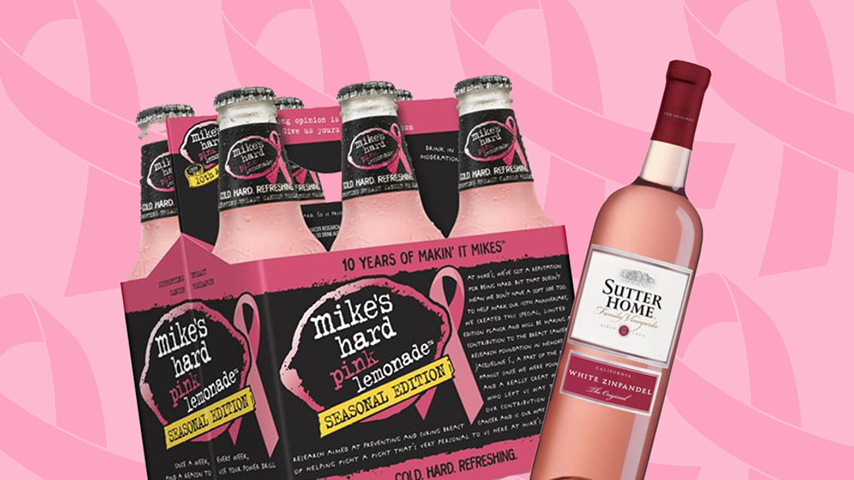

Seul 5 images ont été trouvées...
Voici des images susceptibles de vous plaire et qui correspondent le plus avec vos favoris.


In [34]:
from pandas.io.json import json_normalize
import pandas as pd
import json, re
import numpy
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import webcolors
from operator import itemgetter
from PIL import ImageColor
from random import randrange
from IPython.display import Image, display


#---------------- GET COLOR NAME FROM HEX VALUE -----------------#

def closestColor(requested_colour):
    COLOR_NAMES_TO_HEX = {
    "aqua": "#00ffff",
    "black": "#000000",
    "blue": "#0000ff",
    "fuchsia": "#ff00ff",
    "green": "#00ff00",
    "red": "#ff0000",
    "white": "#ffffff",
    "yellow": "#ffff00",
    }
    min_colours = {}
    for colorKey in COLOR_NAMES_TO_HEX:
        colorHex = COLOR_NAMES_TO_HEX[colorKey]
        r_c, g_c, b_c = webcolors.hex_to_rgb(colorHex)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = colorKey
    return min_colours[min(min_colours.keys())]

def getColorName(requested_colour):
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closestColor(requested_colour)
        actual_name = None
    return actual_name, closest_name

#---------------------------------------------------------------#

def getImageCategorySize(size):
    if size < 50000:
        return "tiny"
    elif size > 50000 and size < 100000:
        return "little"
    elif size > 100000 and size < 200000:
        return "medium"
    else:
        return "big"        
    

def getArrayPicturesSampleAndData(arrayPictures):
    samplePictures = []
    dataPictures = []
    for picture in arrayPictures:
        if picture['isSample'] == 1:
            samplePictures.append(picture)
        else:
            dataPictures.append(picture)
    return samplePictures, dataPictures

def getArrayPictures(jsonData):
    return jsonData["pictures"]

def openJsonFile(path):
    with open(path, "r") as jsonFile:
        try:
            return json.load(jsonFile)
        except:
            print("Erreur lors de l'ouverture du fichier 'project/data.json' ...")
            return 1
    
def verifyPseudo(pseudo, jsonData):
    usernames = list(map(itemgetter('username'), jsonData["users"])) 
    if(pseudo in usernames):
        return 0
    else:
        return 1

def addUsernameOnJsonFile(pseudo,jsondata):
    data = {"username": pseudo, "favorites": []}
    jsondata['users'].append(data)
    with open("project/data.json", "w") as jsonFile:
            json.dump(jsondata, jsonFile)
    print("Utilisateur ",pseudo,"crée !")
    
def pseudoConnectionChoice():
    pseudo = ""
    while True:
        pseudo = input("Quel est votre pseudo ?")
        if re.match("^[A-Za-z0-9_-]*$", pseudo):
            break  
        else:
            print("Seuls les lettres, les nombres, le caractère '-' et le caractère '_' sont acceptés.")
    return pseudo
    
def createAccountFeature(jsonData):
    pseudo = pseudoConnectionChoice()
    if verifyPseudo(pseudo, jsonData) == 0:
            print("Ce pseudo est déjà existant dans la base de donnée, veuillez en saisir un nouveau")
            return 1
    else:
        addUsernameOnJsonFile(pseudo,jsonData)

def connectionFeature(jsonData):
    pseudo = pseudoConnectionChoice()
    if verifyPseudo(pseudo, jsonData) == 1:
            print("Ce pseudo ne correspond à aucune entrée dans la base de données...")
            return 1
    return pseudo

def getFavoriteIDsPictures(PSEUDO, users):
    for user in users:
        if user["username"] == PSEUDO:
            if len(user["favorites"]) == 0:
                print("Aucune image mise en favori pour l'utilisateur " + PSEUDO + " ...")
                return 1
            return user["favorites"]
    print("Impossible de récupérer les images favorites du pseudo " + PSEUDO + " ...")
    return 1


###########----------------Gestion favoris ------------ #######
def set_favorites(newFav,jsondata,usernameId):
    jsondata['users'][usernameId]['favorites'] = list(newFav)
    print(jsondata['users'][usernameId]['favorites'])
    with open("project/data.json", "w") as jsonFile:
        json.dump(jsondata, jsonFile)
    print("Liste des favoris modifiée !")    
    
def fav_images(username,jsondata):
    while True :
        n = input("1= Voir la liste des favoris /2 = Ajouter des favoris /3= Supprimer des favoris")
        if n in ['1','2','3']:
            break
        else:
            print("Saisie invalide")
    if n == '1':
        a,b = get_favorites_from_user(username,jsondata)
        if len(a) == 0 :
            print("Aucune image mise en favori...")
            return 1
        else :
            listName = get_name_images(a,jsondata)
            return 1
    if n == '2':
        arrayName = []
        listRes = []
        listName = get_all_name_images(jsondata)
        #display_images(listName)
        oldFav,i = get_favorites_from_user(username,jsondata)
        try:
            arrayName = [int(x) for x in input("Selectionnez 6 à 10 images à mettre en favoris (séparé par des espaces)").split()]
            listFav = numpy.concatenate((oldFav, arrayName))
            listFav = numpy.unique(listFav).astype(int).tolist()#supprimer les doublons
            if len(listFav) > 10 or len(listFav) < 6 :
                print("Nombre de favoris hors borne (il faut en avoir entre 6 et 10 !)")
                raise ValueError
            listFav.sort()
            listFav = list(listFav)
            set_favorites(listFav,jsondata,i)
            return 1
        except ValueError:
            print("Mauvaise saisie")
            return 1
        #n = input(str(listName))
    if n == '3':
        a,b = get_favorites_from_user(username,jsondata)
        listName = []
        listName = get_name_images(a,jsondata)
        try:
            arrayName = [int(x) for x in input("Selectionnez la liste des images à supprimer en favoris (séparé par des espaces)").split()]
            for i in arrayName :
                a.remove(i)
            if len(a) > 10 or len(a) < 6 :
                print("Nombre de favoris hors borne (il faut en avoir entre 6 et 10 !)")
                raise ValueError
            set_favorites(a,jsondata,b)
            return 1
        except ValueError:
            print("Mauvaise saisie")
            return 1
        #n = input(str(listName))
        
def get_favorites_from_user(username,jsondata):
    listFav = []
    tmp = jsondata['users']
    value = 0
    for i in tmp:
        if i['username'] == username:
            listFav = i['favorites']
            break
        value += 1
    return listFav, value
    
def get_name_images(listFav,jsondata):
    tmp = jsondata['pictures']
    listName = []
    count = 0
    for i in listFav:
        print(i,":",tmp[i]['name']) 
        listName.append(tmp[i]['name'])
    return listName

def get_all_name_images(jsondata):
    tmp = jsondata['pictures']
    listName = []
    count = 0
    for i in tmp:
        if i['isSample'] == 1 :
            print(tmp.index(i),":",i['name']) 
            listName.append(i['name'])
    return listName
#----------------------------------
def getSingleDataframePicture(picture):
    listDataFrame = []
    actualColorName, closestColorName = getColorName(ImageColor.getrgb(picture["color"]))
    listDataFrame.append(closestColorName if (actualColorName == None) else actualColorName)
    for tag in picture["tag"]:
        listDataFrame.append(tag)
    listDataFrame.append(getImageCategorySize(picture["size"]))
    return listDataFrame

def getDataframedPictures(arrayPictures):
    if len(arrayPictures) < 1:
        print("Aucune image dans le jeu de données...")
        return 1
    listDataframedPictures = []
    for picture in arrayPictures:
        listDataFrame = getSingleDataframePicture(picture)
        listDataframedPictures.append(listDataFrame)
    return listDataframedPictures



def getFavoriteSampleArray(arrayIDsFavoritePictures, imagesCollectionLength):
    if len(arrayIDsFavoritePictures) < 1:
        print("Aucune image mise en favori...")
        return 1
    favoriteSampleArray = []
    for i in range(imagesCollectionLength):
        if (i+1) in arrayIDsFavoritePictures:
            favoriteSampleArray.append("favorite")
        else:
            favoriteSampleArray.append("notfavorite")
    return favoriteSampleArray  
    
def getFramesEncoder(data, result):
    dataframe = pd.DataFrame(data, columns=['color', 'alcoholType', 'environment', 'others', 'imageCategory'])
    resultframe = pd.DataFrame(result, columns=['favorite'])
    return dataframe, resultframe

def findBestMatchingPictures(dataPictures, randomForestClassifier, labelEncodersArray, size):
    picturesFound = 0
    matchingPictures = []
    testedPictures = []
    while(picturesFound < size and len(testedPictures) < len(dataPictures)):
        randomPictureIndex = randrange(len(dataPictures))
        if randomPictureIndex in testedPictures:
            continue
        testedPictures.append(randomPictureIndex)
        randomPicture = dataPictures[randomPictureIndex]
        if randomPictureIndex in matchingPictures:
            continue
        dataframePicture = getSingleDataframePicture(randomPicture)
        prediction = randomForestClassifier.predict([
        [labelEncodersArray[0].transform([dataframePicture[0]])[0], labelEncodersArray[1].transform([dataframePicture[1]])[0],
        labelEncodersArray[2].transform([dataframePicture[2]])[0], labelEncodersArray[3].transform([dataframePicture[3]])[0], 
         labelEncodersArray[4].transform([dataframePicture[4]])[0]]])
        if labelEncodersArray[5].inverse_transform(prediction) == "favorite":
            picturesFound = picturesFound + 1
            matchingPictures.append(randomPictureIndex)
    return matchingPictures, (0 if len(testedPictures) < len(dataPictures) else 1)

def getImagesNameFromIndex(dataPictures, indexArray):
    imagesName = []
    for index in indexArray:
        imagesName.append(dataPictures[index]["name"])
    return imagesName

def showMatchingPictures(matchingPictures):
    for picture in matchingPictures:
        display(Image(filename="project/testimages/" + picture))
        
def __main__():
    PSEUDO = ""
    while True:
        choix = input("Que voulez-vous faire ? (1: création de compte | 2: connexion)")
        if choix in ["1", "2"]:
            break
        else:
            print("Saisie invalide, veuillez choisir entre 1 et 2.")    
            
    #Ouverture du fichier JSON (une seule fois)
    jsonData = openJsonFile("project/data.json")
    if jsonData == 1:
        return 1
    # Action selon le choix de l'utilisateur
    if choix == "1":
        ret = createAccountFeature(jsonData)
        return 1
    else:
        PSEUDO = connectionFeature(jsonData)
        if PSEUDO == 1:
            return 1
        while True:
            choix = input("1 : Proposez des images | 2 : Gerer les favoris")
            if choix in ["1", "2"]:
                break
        else:
            print("Saisie invalide, veuillez choisir entre 1 et 2.")
        if choix == "2" :
            return fav_images(PSEUDO,jsonData)
        if choix == "1" :
            print("Recherches des meilleures images...")
                
    
    #Stockage des images complètes, échantillon d'image et image de jeu de données dans des variables
    arrayPictures = getArrayPictures(jsonData)
    samplePictures, dataPictures = getArrayPicturesSampleAndData(arrayPictures)
    
    # Récupération des ID d'images favorites
    arrayIDsFavoritePictures = getFavoriteIDsPictures(PSEUDO, jsonData["users"])
    if arrayIDsFavoritePictures == 1:
        return 1
    
    # Récupération des images favorites selon les ID récupérés précédemment
    listDataframedPictures = getDataframedPictures(samplePictures)
    if listDataframedPictures == 1:
        return 1
    
    # Récupération du tableau booléen des images favorites/non favorites
    favoriteSampleArray = getFavoriteSampleArray(arrayIDsFavoritePictures, len(samplePictures))
    if favoriteSampleArray == 1:
        return 1
    
    # Création du dataframe et du resultframe
    dataframe, resultframe = getFramesEncoder(listDataframedPictures, favoriteSampleArray)
    
    labelEncodersArray = []
    
    # Création des LabelEncoder
    le1 = LabelEncoder()
    dataframe['color'] = le1.fit_transform(dataframe['color'])
    le2 = LabelEncoder()
    dataframe['alcoholType'] = le2.fit_transform(dataframe['alcoholType'])
    le3 = LabelEncoder()
    dataframe['environment'] = le3.fit_transform(dataframe['environment'])
    le4 = LabelEncoder()
    dataframe['others'] = le4.fit_transform(dataframe['others'])
    le5 = LabelEncoder()
    dataframe['imageCategory'] = le5.fit_transform(dataframe['imageCategory'])
    le6 = LabelEncoder()
    resultframe['favorite'] = le6.fit_transform(resultframe['favorite'])
    
    # Ajouts des labels dans un tableau
    labelEncodersArray.append(le1)
    labelEncodersArray.append(le2)
    labelEncodersArray.append(le3)
    labelEncodersArray.append(le4)
    labelEncodersArray.append(le5)
    labelEncodersArray.append(le6)
    
    #Utilisation d'un RandomForestClassifier
    randomForestClassifier = RandomForestClassifier(n_estimators=20, max_depth=3,
                             random_state=0)
    randomForestClassifier = randomForestClassifier.fit(dataframe, resultframe.values.ravel())
    
    # Algorithme de récupération des images les plus susceptibles de plaire à l'utilisateur
    matchingPicturesId, returnCode = findBestMatchingPictures(dataPictures, randomForestClassifier, labelEncodersArray, 10)
    if len(matchingPicturesId) == 0:
        print("Aucune image correspondant à vos favoris n'a été trouvée...")
        return 1
    
    # Récupération du nom des images selon les IDs récupérées précédemment
    matchingPictures = getImagesNameFromIndex(dataPictures, matchingPicturesId)
    
    # Affichage des images et d'un message différent selon le résultat
    showMatchingPictures(matchingPictures)
    if returnCode == 1:
        print("Seul " + str(len(matchingPicturesId)) + (" images ont été trouvées..." if len(matchingPicturesId) > 1 else " image a été trouvée..."))
    print("Voici des images susceptibles de vous plaire et qui correspondent le plus avec vos favoris.")
    
if __main__() == 1:
    print("Sortie du script...")